In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
df1=pd.read_csv('/kaggle/input/titanic/train.csv')
# Have a first look at train data
print('Train shape:', df.shape)
# Have a look at first 5 data observations
df1.head()

NameError: name 'df' is not defined

In [3]:
df1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


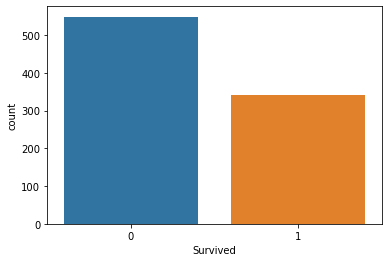

In [4]:
import seaborn as sns
sns.countplot(df1['Survived'])
# Classification problem

In [5]:
df1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bailey, Mr. Percy Andrew",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#Check for missing values
df1.isnull().sum()
df1.isnull().mean().sort_values(ascending = False)
# Cabin has 77%, Age has 20% and Embarked has 0.2% missing values

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

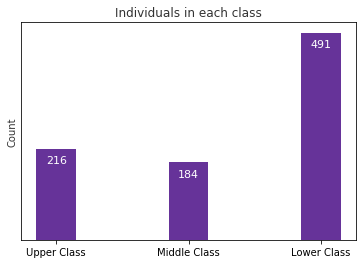

In [7]:
Pclass=df1.groupby(by='Pclass').size()
pos=range(len(Pclass))
plt.figure()
bars=plt.bar(pos,Pclass,width=0.3, color='rebeccapurple')
plt.ylabel('Count', alpha=0.8)
plt.title('Individuals in each class', alpha=0.8)
# remove all the ticks (both axes), and tick labels on the Y axis
plt.xticks(pos,['Upper Class','Middle Class','Lower Class'])
plt.yticks([])
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 35, str(int(bar.get_height())), 
                 ha='center', color='w', fontsize=11)
plt.show()

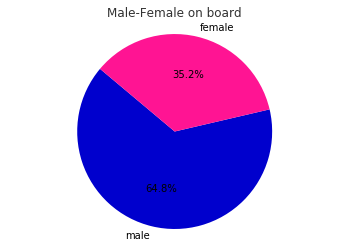

In [8]:
# Data to plot
height_sex=np.array([np.sum(df1['Sex']=='male'),np.sum(df1['Sex']=='female')])
labels = df1['Sex'].unique()
colors = ['mediumblue','deeppink']

# Plot
plt.figure()
plt.pie(height_sex, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Male-Female on board',alpha=0.8)
plt.show()

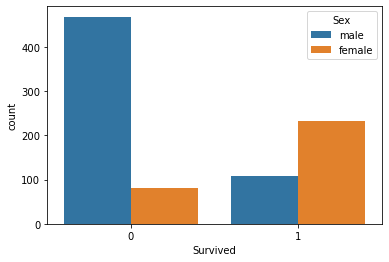

In [9]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df1)

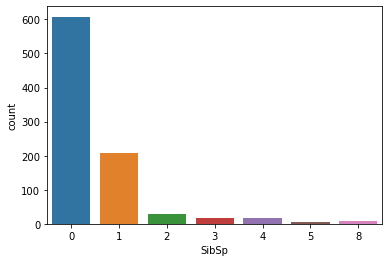

In [10]:
sns.countplot(df1['SibSp'])

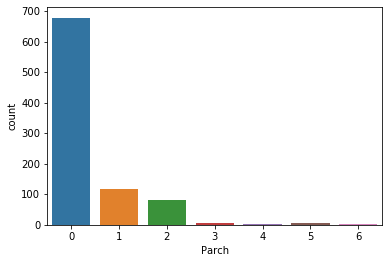

In [11]:
sns.countplot(df1['Parch'])

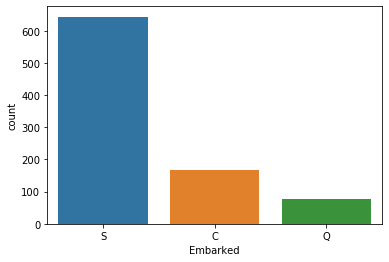

In [12]:
sns.countplot(df1['Embarked'])

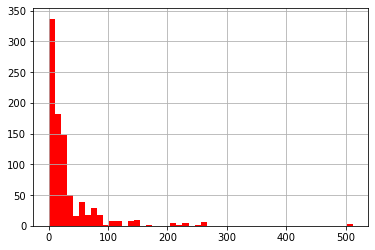

In [13]:
df1['Fare'].hist(bins = 50, color = 'red')

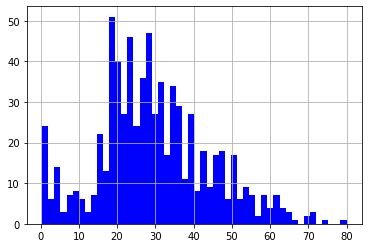

In [14]:
df1['Age'].hist(bins = 50, color = 'blue')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


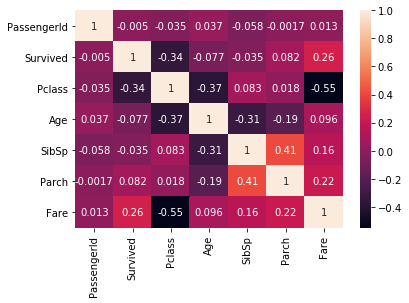

In [16]:
sns.heatmap(df1.corr(), annot = True)
# object class correlations not present, so this will help in im[puting age values only

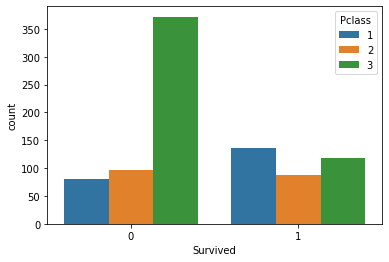

In [17]:
# From heatmap, Age seems to have highest correlation with Pclass
sns.countplot(x = 'Survived', hue = 'Pclass', data = df1)

In [18]:
# Pclass influences age hence we will use this to fill in our missing values 
age_group = df1.groupby("Pclass")["Age"]
print(age_group.median())
#replace missing values in Age based on particular class age median

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [19]:
df1.groupby(by='Embarked').size()
#replace missing values in Embarked by mode of the data

Embarked
C    168
Q     77
S    644
dtype: int64

In [20]:
# Missing value treatment
nan_values = df1.isna()
nan_columns = nan_values.any()
columns_with_nan = df1.columns[nan_columns].tolist()
print(columns_with_nan)
for i in range(len(columns_with_nan)):
    print(np.sum(df1[columns_with_nan[i]].isna()))

['Age', 'Cabin', 'Embarked']
177
687
2


In [21]:
#Note that we need to fix the data in test set as well
df2=pd.read_csv('/kaggle/input/titanic/test.csv')
#Check for missing values
df2.isnull().sum()
df2.isnull().mean().sort_values(ascending = False)

Cabin          0.782297
Age            0.205742
Fare           0.002392
Embarked       0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [22]:
# A trick to keep 'Survived' in our dataset
df2['Survived'] = np.nan

# Train + test concatenation
df = pd.concat([df1, df2])
df.isnull().mean().sort_values(ascending = False)
#Note that 77% of cabin data is missing so it's better to delete that feature

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

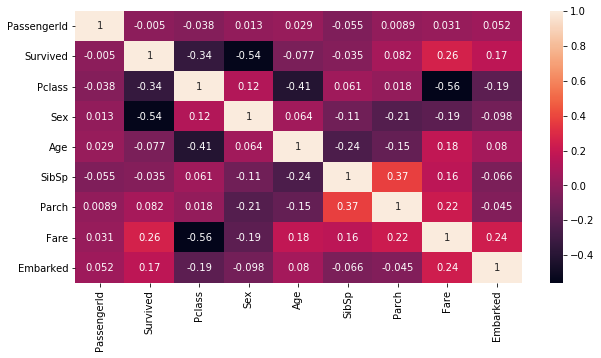

In [23]:
#For Embarked
from statistics import mode
df["Embarked"] = df["Embarked"].fillna(mode(df["Embarked"]))
#Categorical variable tranformation

# Convert 'Sex' variable to integer form!
df['Sex']=df['Sex'].replace('female',0)
df['Sex']=df['Sex'].replace('male',1)

# Convert 'Embarked' variable to integer form!
df['Embarked'] = df['Embarked'].replace('S',1)
df['Embarked'] = df['Embarked'].replace('Q',2)
df['Embarked'] = df['Embarked'].replace('C',3)

plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True)
#Age and fare both are related to Pclass

0


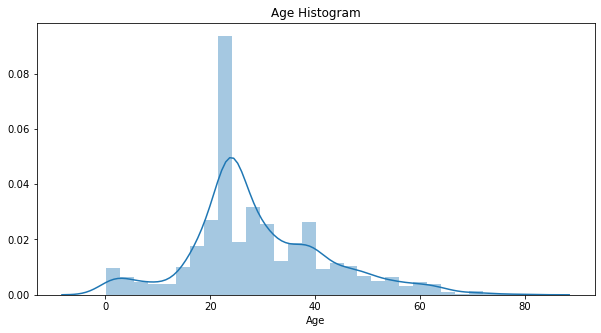

In [24]:
#For Age
# Grouping by Pclass and using a lambda to impute the Age median
df['Age'] = df.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))
print(df["Age"].isnull().sum())
plt.figure(figsize = (10, 5))

sns.distplot(df["Age"])
plt.title("Age Histogram")
plt.xlabel("Age")
plt.show()

In [25]:
# Grouping by Pclass and using a lambda to impute the Fare median
df['Fare'] = df.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))
#For Cabin
df['Cabin'] = df['Cabin'].fillna('U')
np.sum(np.sum(df.isna()))

df.isnull().mean().sort_values(ascending = False)

Survived       0.319328
Embarked       0.000000
Cabin          0.000000
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [26]:
#Turning cabin number 
df['Cabin']=df['Cabin'].str[:1]
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
df['Cabin'] = df['Cabin'].map(cabin_category)
df['Cabin'].unique().tolist()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,9,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,3
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,9,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",1,24.0,0,0,A.5. 3236,8.0500,9,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,3,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,9,1
416,1308,NaN,3,"Ware, Mr. Frederick",1,24.0,0,0,359309,8.0500,9,1


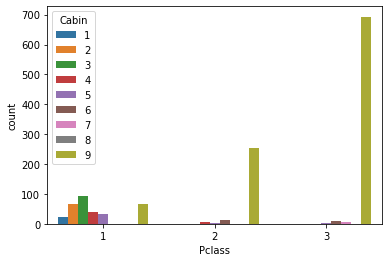

In [27]:
sns.countplot(x = 'Pclass', hue = 'Cabin', data = df)

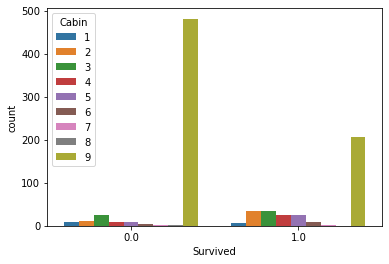

In [28]:
sns.countplot(x = 'Survived', hue = 'Cabin', data = df)

In [29]:
#Let's look at Name
df['Name'].head()
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
df['Title'].unique().tolist()

# Look at salutations percentages
df['Title'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Rev          0.611154
Dr           0.611154
Col          0.305577
Ms           0.152788
Major        0.152788
Mlle         0.152788
Countess     0.076394
Dona         0.076394
Lady         0.076394
Don          0.076394
Mme          0.076394
Jonkheer     0.076394
Sir          0.076394
Capt         0.076394
Name: Title, dtype: float64

In [30]:
#replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col','Sir']:
        return 'Mr'
    elif title in ['Countess', 'Mme','Dona','Lady']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['Title']=df.apply(replace_titles, axis=1)
df['Title'].value_counts(normalize = True) * 100

Mr        59.205500
Miss      20.168067
Mrs       15.966387
Master     4.660046
Name: Title, dtype: float64

In [31]:
title_category = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4}
df['Title'] = df['Title'].map(title_category)
df['Title'].unique().tolist()

[1, 3, 2, 4]

In [32]:
# Engineer 'familySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [33]:
# Drop redundant features - 'SibSp', 'Parch','Name' and useless features-'Ticket'
df = df.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis = 1)

In [34]:
# Recover test dataset
test = df[df['Survived'].isna()].drop(['Survived'], axis = 1)

# Recover train dataset
train = df[df['Survived'].notna()]
# Cast 'Survived' back to integer
train['Survived'] = train['Survived'].astype(np.int8)
train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,22.0,7.2500,9,1,1,2
1,2,1,1,0,38.0,71.2833,3,3,3,2
2,3,1,3,0,26.0,7.9250,9,1,2,1
3,4,1,1,0,35.0,53.1000,3,1,3,2
4,5,0,3,1,35.0,8.0500,9,1,1,1


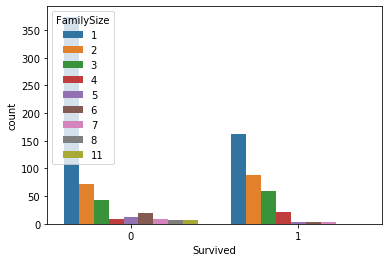

In [35]:
sns.countplot(x='Survived',hue='FamilySize',data=train)

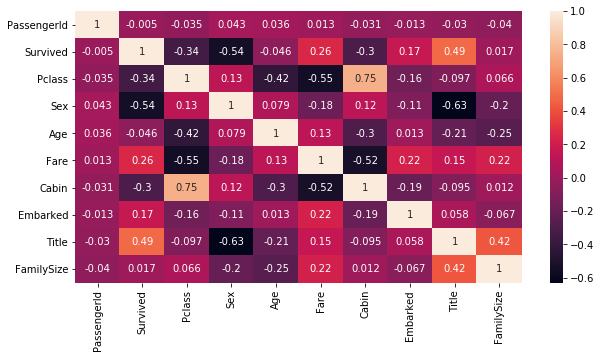

In [36]:
plt.figure(figsize = (10, 5))
sns.heatmap(train.corr(), annot = True)

In [37]:
# Import module for dataset splitting
from sklearn.model_selection import train_test_split

# Here is out local validation scheme!
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Survived', 'PassengerId'], axis = 1), 
                                                    train['Survived'], test_size = 0.2, 
                                                    random_state = 2)

In [38]:
# Using logistic regression model 
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression(max_iter = 10000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Predict!
predictions = logisticRegression.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

# Print the resulting confusion matrix
print(confusion_matrix(y_test, predictions))

[[89 11]
 [23 56]]


In [40]:
# Calculate Accuracy!
accuracy = (89 + 56) / (89 + 11 + 23 + 56)
print('accuracy is: ' + str(round(accuracy, 3)))

accuracy is: 0.81


In [41]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(LogisticRegression(max_iter=10000),X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[0.84615385 0.86713287 0.85915493 0.81690141 0.8028169 ]
0.8384319905446667


In [42]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize randomForest
randomForest = RandomForestClassifier(random_state = 2)
# Set our parameter grid
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]    
}
from sklearn.model_selection import GridSearchCV

# Grid search
randomForest_CV = GridSearchCV(estimator = randomForest, param_grid = param_grid, cv = 5)
randomForest_CV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=2,
                                   

In [43]:
# Print best hyperparameters
randomForest_CV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 500}

In [44]:
# Define our optimal randomForest algo
randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = 'gini', max_depth = 3, max_features = 'auto', n_estimators = 500)
# Fit the model to the training set
randomForestFinalModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [45]:
# Predict!
predictions = randomForestFinalModel.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate the accuracy for our powerful random forest!
print("accuracy is: ", round(accuracy_score(y_test, predictions), 3))

accuracy is:  0.804


In [46]:
# Accuracy of Logistic Regression is more than Random Forest
test['Survived'] = logisticRegression.predict(test.drop(['PassengerId'], axis = 1))
# Write test predictions for final submission
test[['PassengerId', 'Survived']].to_csv('titanic_submission.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
